# Rainy Days

The term "rainy day" can be attributed to any day in which rain falls. Of course, not all "rainy days" are equal; some rainy days see torrential downpours while others see mere drizzles. I sought to find out what types of rainy days we face here in Philadelphia and to understand how these rainfall patterns have changed over time.

I was able to access 21 years of Philadelphia weather data. Using this data, I was able to identify the number of rainy days in Philadelphia per year from 2005 to 2025.

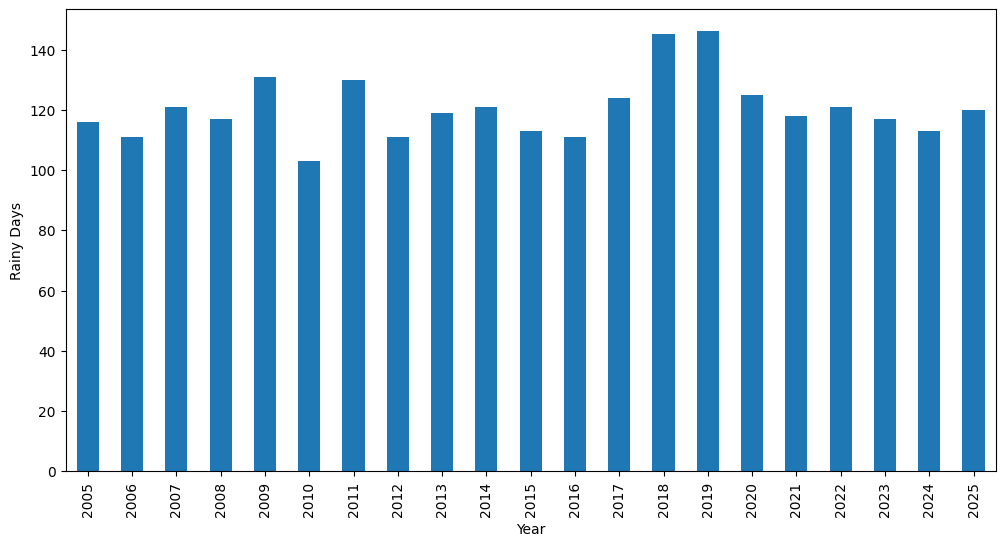

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

weather_df = pd.read_csv('../../05b_DOW1_and_Data_Storytelling/data/philadelphia_weather_2005_to_2025.csv')
weather_df = weather_df.assign(date=pd.to_datetime(weather_df['date']))

weather_df['any_rain'] = weather_df["rain"]>0
rainy_days_by_year=weather_df.groupby("year")["any_rain"].sum()

plt.figure(figsize=(12, 6))
rainy_days_by_year.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Rainy Days")
plt.show()

The average of the annual number of rainy days slightly increased from 117.5 (2005-2015) to 123.0 (2015-2025). Though only a difference of less than a week, these numbers point toward an upward trend in rainfall. So, the annual total rainfall must be increasing as well, right? WRONG!

# Rainfall

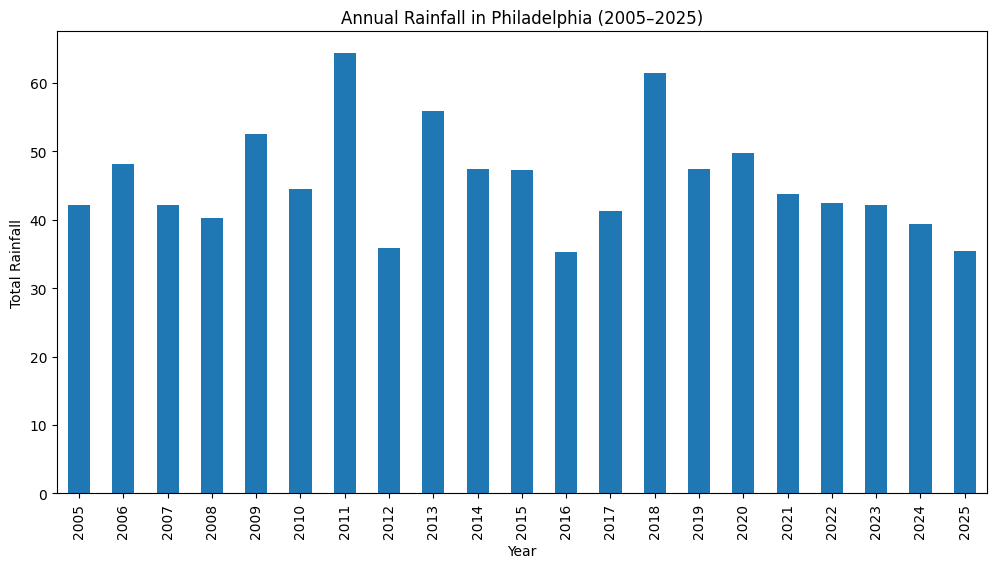

In [29]:
annual_rainfall=weather_df.groupby("year")["rain"].sum()
plt.figure(figsize=(12, 6))
annual_rainfall.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Total Rainfall")
plt.title("Annual Rainfall in Philadelphia (2005–2025)")
plt.show()

The annual rainfall has decreased over the past 21 years from 47.3 inches (2005-2015) to 44.2 inches (2015-2025). The difference in these trends shows that annual rainfall considerably varies from year to year, and there doesn't seem to be a clear-cut trend in Philly's rainfall patterns. 

# Rain Levels

To better understand this data, I used the Bhutan National Center for Hydrology and Meteorology's 7-point scale of 24-hour rainfall intensity to categorize each day based on amount of rainfall, from "no rain" or "very light rain" to "extremely heavy rainfall" (https://www.nchm.gov.bt/attachment/ckfinder/userfiles/files/Rainfall%20intensity%20classification.pdf).

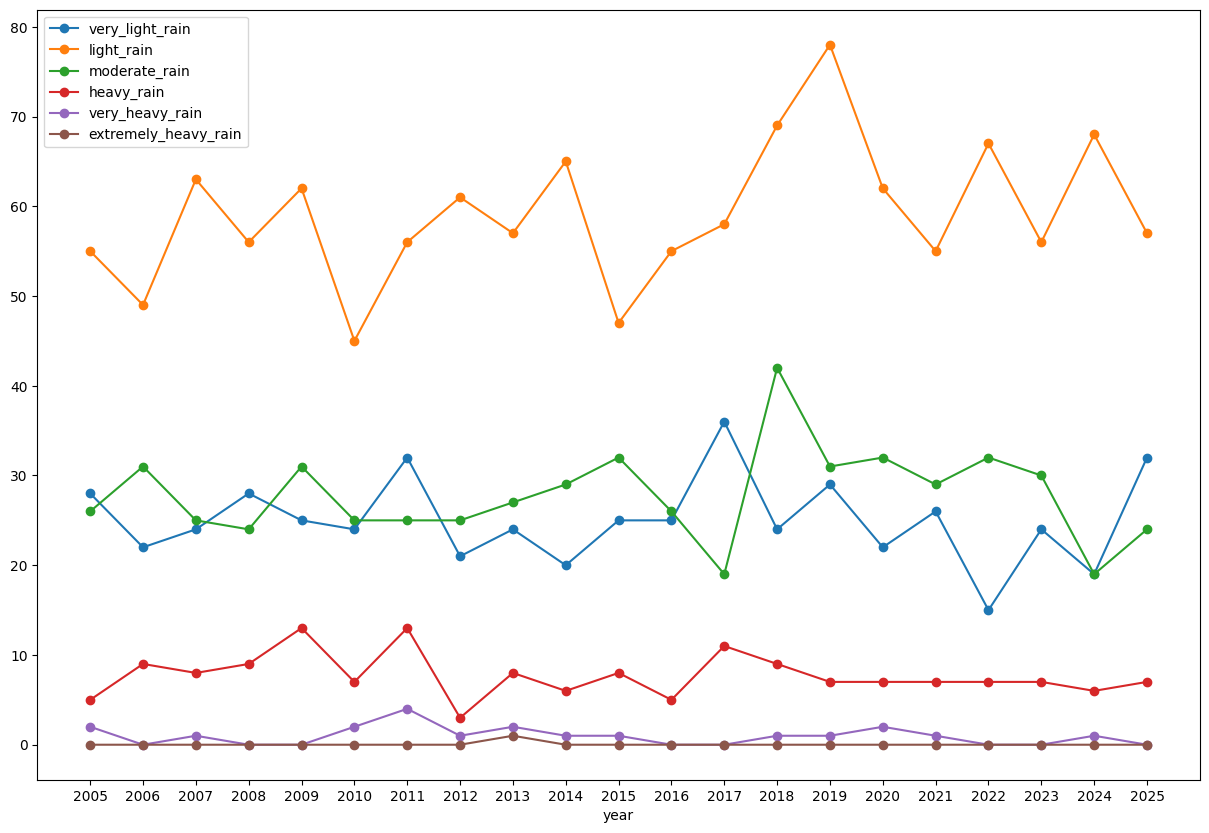

In [27]:
weather_df['no_rain'] = weather_df["rain"] == 0
weather_df['very_light_rain'] = (
    (25.4*weather_df["rain"] > 0) &
    (25.4*weather_df["rain"] < 1)
)
weather_df['light_rain'] = (
    (25.4*weather_df["rain"] >= 1) &
    (25.4*weather_df["rain"] < 10)
)
weather_df['moderate_rain'] = (
    (25.4*weather_df["rain"] >= 10) &
    (25.4*weather_df["rain"] < 30)
)
weather_df['heavy_rain'] = (
    (25.4*weather_df["rain"] >= 30) &
    (25.4*weather_df["rain"] < 70)
)
weather_df['very_heavy_rain'] = (
    (25.4*weather_df["rain"] >= 70) &
    (25.4*weather_df["rain"] < 150)
)
weather_df['extremely_heavy_rain'] = 25.4*weather_df["rain"] >= 150

rain_levels = [
    'very_light_rain', 'light_rain', 'moderate_rain', 'heavy_rain', 'very_heavy_rain', 'extremely_heavy_rain'
]

rain_by_year = weather_df.groupby("year")[rain_levels].sum()
rain_by_year.plot(figsize=(15,10), marker="o").set_xticks(rain_by_year.index);

In [28]:
rain_by_year

,very_light_rain,light_rain,moderate_rain,heavy_rain,very_heavy_rain,extremely_heavy_rain
year,,,,,,
2005,28,55,26,5,2,0
2006,22,49,31,9,0,0
2007,24,63,25,8,1,0
2008,28,56,24,9,0,0
2009,25,62,31,13,0,0
2010,24,45,25,7,2,0
2011,32,56,25,13,4,0
2012,21,61,25,3,1,0
2013,24,57,27,8,2,1


The above graph and table are rather illuminating to Philadelphia's rainfall trends. Though there was an increase in the annual number of days with light rainfall, there was a decrease in the annual number of days with heavy or very heavy rainfall. Additionally, the only "extreme" rain event in Philadelphia occurred in 2013, accounting for over 8 inches of rain in a single day (over 14% of the year's total rainfall!).

# Conclusion

Overall, the change in rain patterns warrants further analysis. The actual amount of rain that falls each year seems to be decreasing, yet more days are considered to be "rainy." This incongruity creates an illusion of increased rainfall when, in reality, the opposite is true. Such a shift toward more frequent but less intense precipitation could have important implications for water resource management, urban drainage systems, and perceptions of climate variability in the region.